In [1]:
!pip install git+https://github.com/hsharrison/pypsr

  Cloning https://github.com/hsharrison/pypsr to /private/var/folders/db/j22pb5pn1ng7hfbk6p0khftc0000gn/T/pip-req-build-p12u1v9t
  Running command git clone --filter=blob:none --quiet https://github.com/hsharrison/pypsr /private/var/folders/db/j22pb5pn1ng7hfbk6p0khftc0000gn/T/pip-req-build-p12u1v9t
  Resolved https://github.com/hsharrison/pypsr to commit 25933e16de287085188614bcc111e7dab2be661b
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib as mpl

#Optional, Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

import pypsr

In [3]:
from scipy.signal import argrelextrema

In [4]:
def lorenz(Var,t,sig,b,r):
    x,y,z = Var
    x_dot = sig*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [5]:
sig = 10
b = 2.667
r = 28


In [6]:

#Initial Conditions
Var0 = [-0.75, 0.25, 0.1]

#Time Steps
t = np.linspace(0,100,100000)

sol = solve_ivp(lambda t, Var: lorenz(Var, t, sig, b, r), [t[0],t[-1]], Var0, method = 'RK45', t_eval = t)

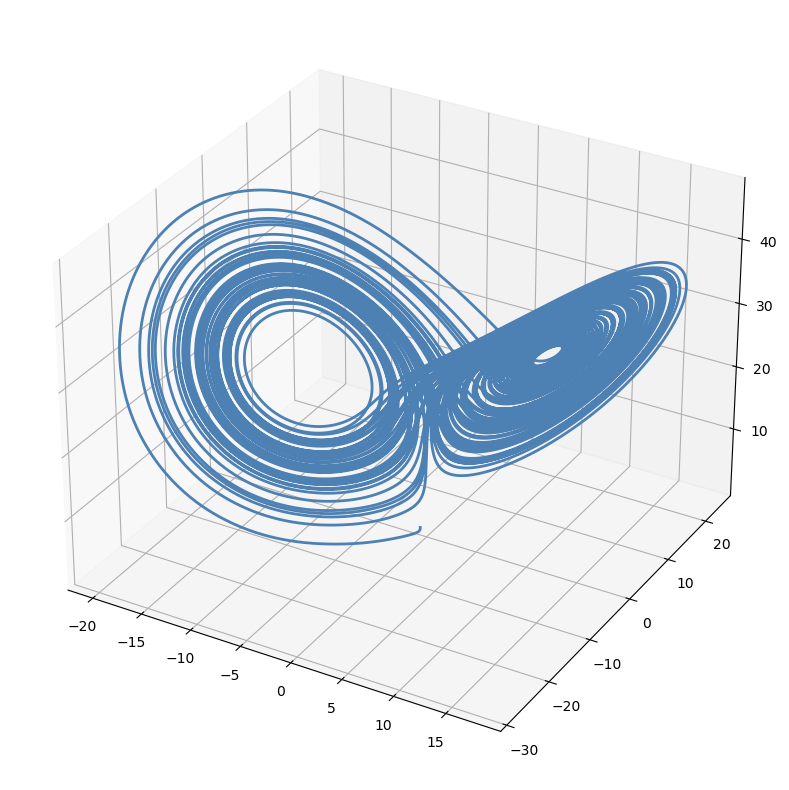

In [16]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(projection = '3d')

ax.plot(sol.y[0,:], sol.y[1,:], sol.y[2,:], linewidth = 2, color = [0.3,0.5,0.7])

#mpl.rcParams['text.usetex']= 'False'

#mpl.rcParams['xtick.labelsize'] = 36
#mpl.rcParams[]

Text(0, 0.5, 'x')

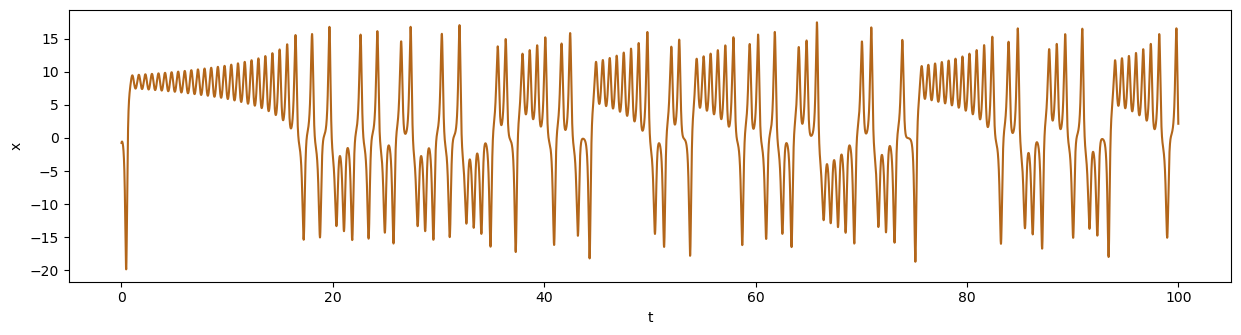

In [17]:
fig = plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
plt.plot(t,sol.y[0,:], color = [0.7,0.4,0.1]);

plt.xlabel('t');
plt.ylabel('x')

In [18]:
lagami=pypsr.lagged_ami(sol.y[0,:], min_lag=0, max_lag=500, lag_step=1, n_bins=100)

In [19]:
argrelextrema(lagami[1],np.less)

(array([152, 156, 274]),)

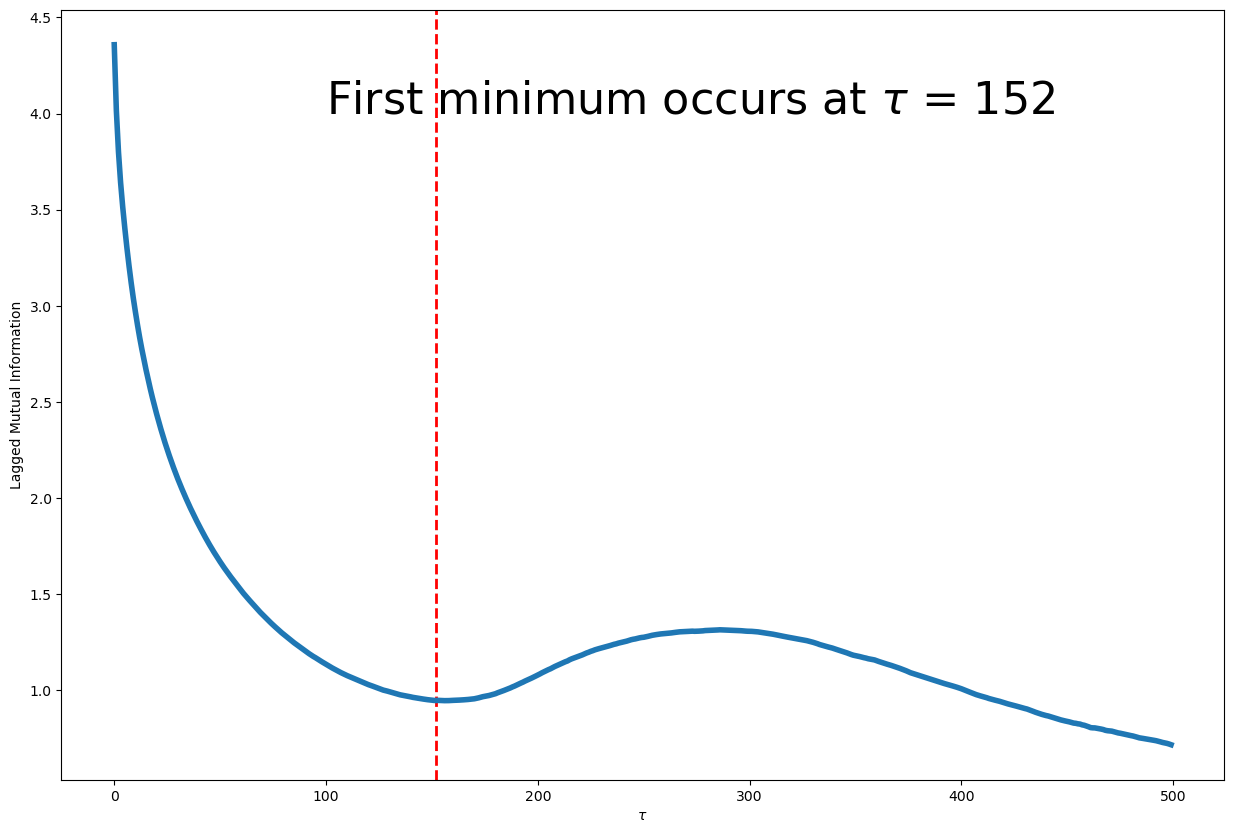

In [20]:
#Mutual Information Method-

# calculate mutual information 
lagami=pypsr.lagged_ami(sol.y[0,:], min_lag=0, max_lag=500, lag_step=1, n_bins=100)

# calculate the first local minima 
wh_local=argrelextrema(lagami[1],np.less)
m_tau=lagami[0][wh_local[0][0]]

# plotting  
fig = plt.figure(figsize=(15, 10))
plt.axvline(x=lagami[0][wh_local[0][0]],ls='--',lw=2,color='r')  
plt.plot(lagami[0], lagami[1], ls='-',lw=4)  
plt.text(100,4,r'First minimum occurs at $\tau$ = %i' % (m_tau),fontsize=32)
plt.xlabel(r'$\tau$') 
plt.ylabel('Lagged Mutual Information');

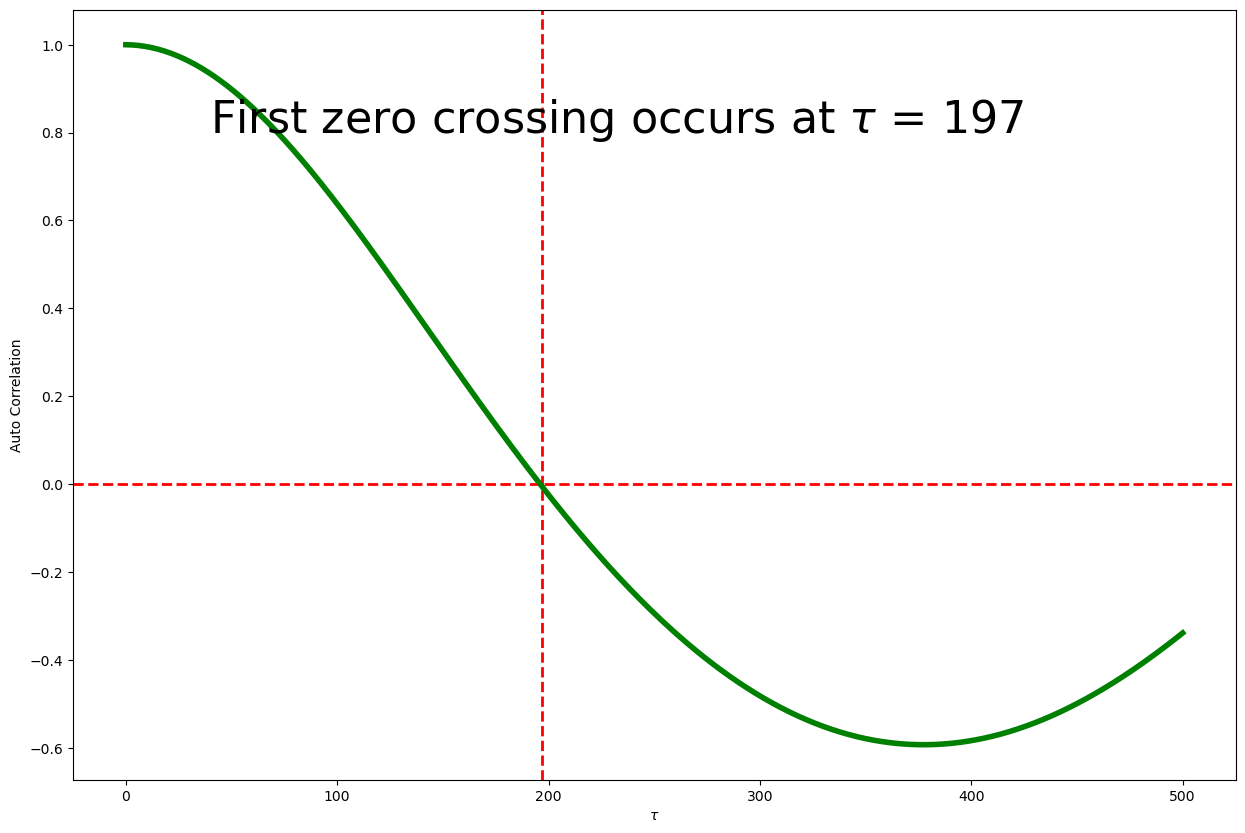

In [21]:
#Auto Correlation Method-

import statsmodels.api as sm
lag_acf=sm.tsa.stattools.acf(sol.y[2,:], nlags=500)

m_tau_a=np.where(lag_acf<=0)[0][0]


fig = plt.figure(figsize=(15,10))

plt.axvline(x=m_tau_a, color='r', linestyle='--',lw=2)
plt.axhline(y=0.0, color='r', linestyle='--',lw=2)


plt.plot(lag_acf[:],ls = '-',lw=4,color='g');

plt.text(40,0.8,r'First zero crossing occurs at $\tau$ = %i' % (m_tau_a),fontsize=32)
plt.xlabel(r'$\tau$') 
plt.ylabel('Auto Correlation');

In [22]:
#Finding Embedding Dimension by False Nearest Neighbor Method-
# Using tau=152
Phasdims=pypsr.global_false_nearest_neighbors(sol.y[0,:],152, min_dims=1, max_dims=10)

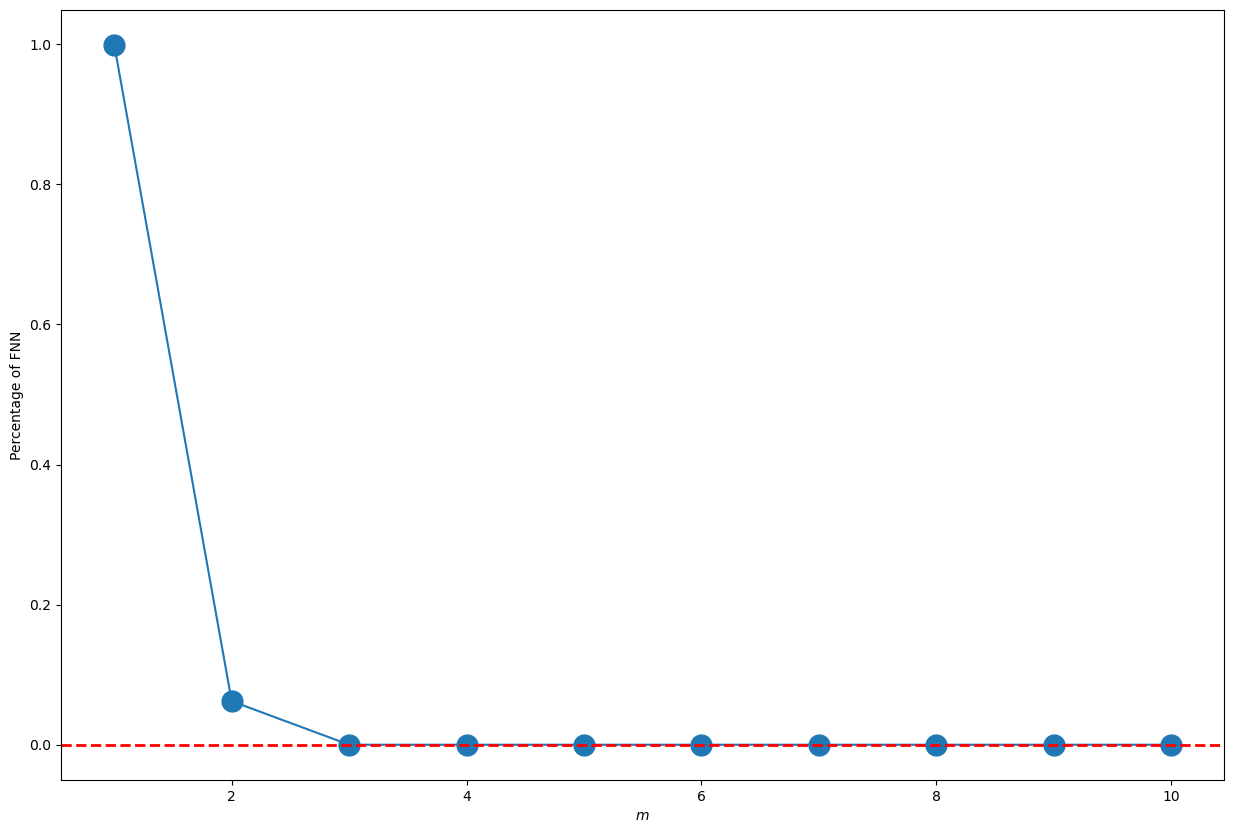

In [23]:
fig = plt.figure(figsize=(15,10))
plt.plot(Phasdims[0], Phasdims[1],marker='o',ms=15)
plt.axhline(y=0, color='r', linestyle='--',lw=2)
plt.ylabel('Percentage of FNN') 
plt.xlabel(r'$m$');

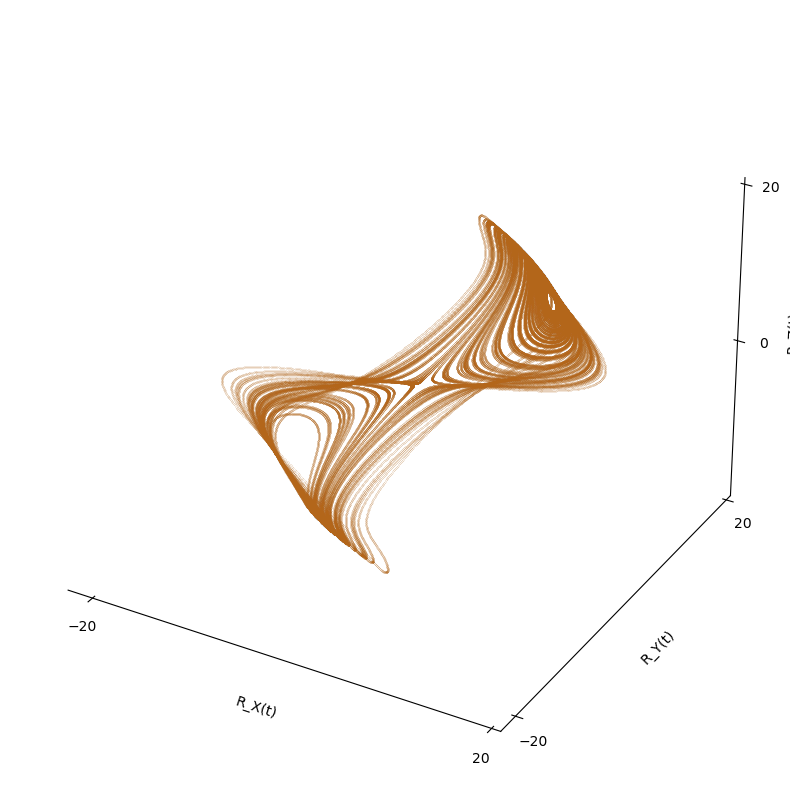

In [24]:
#Phase Space Reconstruction using m and tau-

from mpl_toolkits.mplot3d import axes3d    
# Next let's generate the plot of reconstructed phase space 
Recons=pypsr.reconstruct(sol.y[0,:],152,3)
#Recons.shape


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

mpl.rcParams['axes.labelsize'] = 36
mpl.rcParams['text.usetex']= 'False'

mpl.rcParams['xtick.labelsize'] = 36
mpl.rcParams['ytick.labelsize'] = 36



ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


ax.set_xlabel("R_X(t)")
ax.set_ylabel("R_Y(t)")
ax.set_zlabel("R_Z(t)")

#ax.plot(Recons[:,2],Recons[:,0],Recons[:,1],linewidth=2, color=[0.3,0.5,0.7],linestyle ='None',ms=4)
ax.plot(Recons[:,2],Recons[:,0],Recons[:,1],marker='o', color=[0.7,0.4,0.1],linestyle ='None',ms=0.1)


ax.set_xticks([-20,20])
ax.set_yticks([-20,20])
ax.set_zticks([0,20])

#ax.view_init(10, 250)
ax.grid(False)

plt.show()